Traffic flow assignment

In [1]:
from math import pi
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
def traffic_model_iteration(rho0,nx,nt,dt,dx,Vmax,rho_max):
    # Array initialization
    rho = numpy.copy(rho0)
    dFdx = numpy.empty(nx)
    rho_array = numpy.empty((nx,nt+1))
    rho_array[:,0] = rho
    
    # Time-marching iterations
    for it in range(nt):
        F = Vmax*rho*(1-rho/rho_max)
        dFdx[1:] = (F[1:]-F[:-1])/dx
        drhodt = -dFdx
        rho = rho + dt*drhodt
        rho_array[:,it+1] = rho
    
    # visualization of the traffic density at different time
    pyplot.figure(figsize=(16,8))
    pyplot.subplot(131)
    pyplot.grid(True)
    pyplot.title('Initial condition of traffic density (cars/km)')
    pyplot.plot(x,rho_array[:,0]);

    pyplot.subplot(132)
    pyplot.grid(True)
    pyplot.title('Traffic density (cars/km) after 3 minutes')
    pyplot.plot(x,rho_array[:,int(3/60/dt)]);

    pyplot.subplot(133)
    pyplot.grid(True)
    pyplot.title('Traffic density (cars/km) after 6 minutes')
    pyplot.plot(x,rho_array[:,int(6/60/dt)]);

    return rho_array

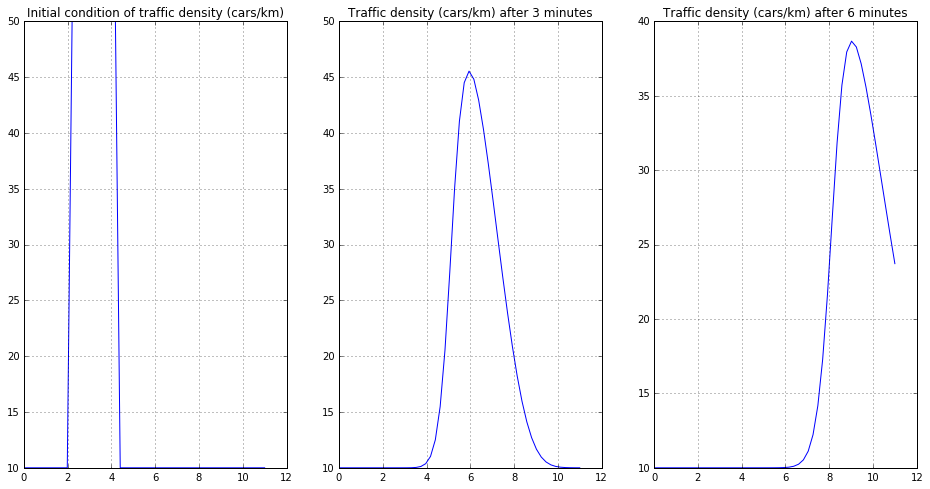

In [3]:
# Model parameters
Vmax = 80
L = 11
rho_max = 250

# Numerical parameters
nx = 51
dt = 0.001
t_final = 6/60

# Driven numerical parameters
nt = int(t_final/dt)
dx = L/(nx-1)

# Initial condition
x = numpy.linspace(0,L,nx)
rho0 = numpy.ones(nx)*10
rho0[10:20] = 50

rho_array = traffic_model_iteration(rho0,nx,nt,dt,dx,Vmax,rho_max)

In [4]:
# Result post-processing for Part A
V0 = Vmax*(1-rho_array[:,0]/rho_max)
V3 = Vmax*(1-rho_array[:,int(3/60/dt)]/rho_max)
V6 = Vmax*(1-rho_array[:,int(6/60/dt)]/rho_max)
min_V0 = numpy.min(V0)/3.6
avg_V3 = numpy.average(V3)/3.6
min_V6 = numpy.min(V6)/3.6
print('The minimum velocity at time t=0 is','% 0.2f' % min_V0,'m/s')
print('The average velocity at time t=3 is','% 0.2f' % avg_V3,'m/s')
print('The minimum velocity at time t=6 is','% 0.2f' % min_V6,'m/s')


The minimum velocity at time t=0 is  17.78 m/s
The average velocity at time t=3 is  20.64 m/s
The minimum velocity at time t=6 is  18.78 m/s


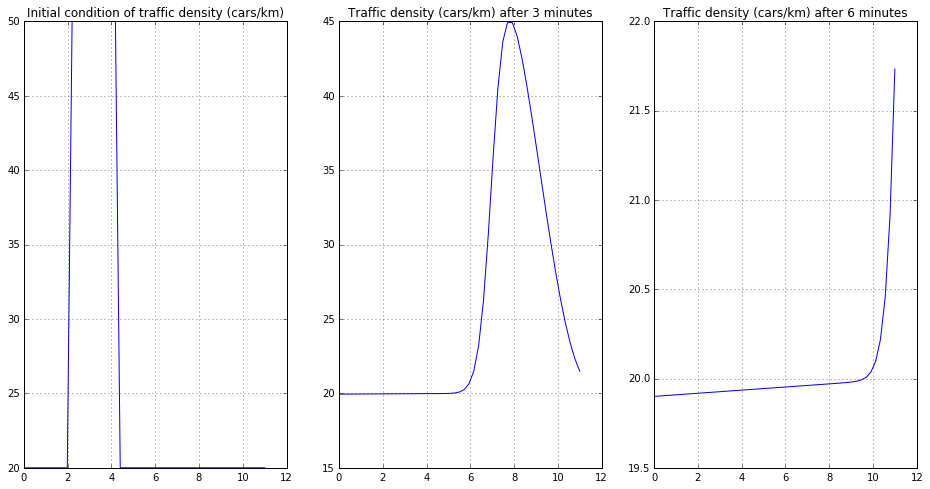

In [5]:
# Model parameters
Vmax = 136
L = 11
rho_max = 250

# Numerical parameters
nx = 51
dt = 0.001
t_final = 6/60

# Driven numerical parameters
nt = int(t_final/dt)
dx = L/(nx-1)

# Initial condition
x = numpy.linspace(0,L,nx)
rho0 = numpy.ones(nx)*20
rho0[10:20] = 50

rho_array = traffic_model_iteration(rho0,nx,nt,dt,dx,Vmax,rho_max)

In [6]:
# Result post-processing for Part B
V0 = Vmax*(1-rho_array[:,0]/rho_max)
V3 = Vmax*(1-rho_array[:,int(3/60/dt)]/rho_max)
min_V0 = numpy.min(V0)/3.6
avg_V3 = numpy.average(V3)/3.6
V0 = Vmax*(1-rho_array[:,0]/rho_max)
V3 = Vmax*(1-rho_array[:,int(3/60/dt)]/rho_max)
V6 = Vmax*(1-rho_array[:,int(6/60/dt)]/rho_max)
min_V0 = numpy.min(V0)/3.6
avg_V3 = numpy.average(V3)/3.6
min_V3 = numpy.min(V3)/3.6

print('The minimum velocity at time t=0 is','% 0.2f' % min_V0,'m/s')
print('The average velocity at time t=3 is','% 0.2f' % avg_V3,'m/s')
print('The minimum velocity at time t=3 is','% 0.2f' % min_V3,'m/s')

The minimum velocity at time t=0 is  30.22 m/s
The average velocity at time t=3 is  33.87 m/s
The minimum velocity at time t=3 is  30.99 m/s
